# 12. Visualisation

### Exercise 12.1

PISA is the OECD's [Programme for International Student Assessment](https://www.oecd.org/pisa/). This programme evaluates educational systems globally by measuring the performance of 15 year-old-children in mathematics, science and reading. The latest study is from 2018.

The data folder of this tutorial includes a CSV file named '[pisa.csv](https://edu.nl/p97ma)'. It contains all the scores measured for mathematics and reading in between 2000 and 2018.  

How did the various countries that were examined in 2018 perform on the reading tests? Which countries had the highest scores, and which countries had the lowest scores? ou can limit the analyses to the the 'total' scores (i.e. those records in which column 'object' has value 'TOT').

Using Pandas, Matplotlib and Seaborn to create a bar plot which can help to answer this question. 

* Create a figure with a size of 10x5
* Rotate the x-tick labels by 90 degrees 
* Use the colour '#910c26'' for all the bars. 

In [1]:
from os.path import join
import pandas as pd

path_to_csv = join('..','Data','pisa.csv')
df = pd.read_csv(path_to_csv)

df_2018 = df[ (df['subject'] == 'TOT') & (df['year'] == 2018)  ]
df_2018 = df_2018.sort_values(by=[ 'pisa_read'] , ascending = False)

Next, we can plot the values in this new dataframe using `Seaborn`. This plot should help us to answer question 1. 

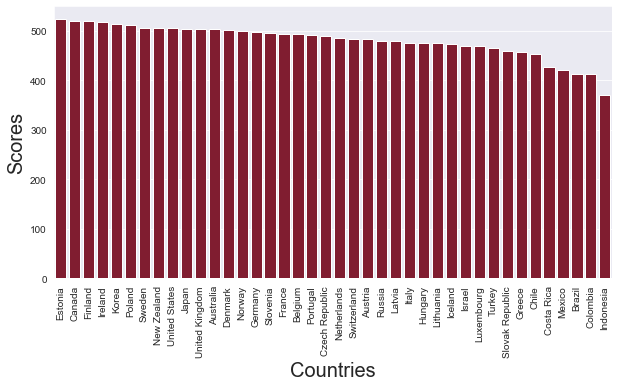

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('darkgrid')
plt.figure( figsize = ( 10,5 ))

graph = sns.barplot( data = df_2018 , x = 'location_name' , y = 'pisa_read' , color = '#910c26' )

graph.set_xlabel('Countries', size = 20) 
graph.set_ylabel('Scores', size = 20) 


plt.xticks( rotation = 90 )

plt.show() 

### Exercise 12.2.

As for exercis 12.1, make a bar chart which gives information about the total scors for reading in 2018. For this exercise, try to give information about the continents as well. Use distinctive colours for each continent. 

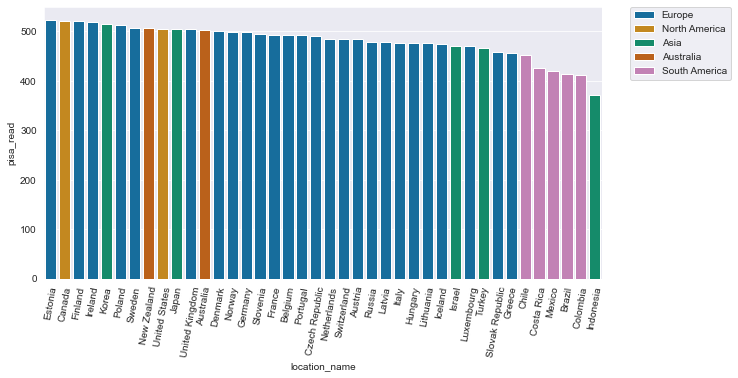

In [3]:
sns.set_style('darkgrid')
colours = sns.color_palette('colorblind' , 7)
plt.figure( figsize = ( 10,5 ))

sns.barplot( data = df_2018 , x = 'location_name' , y = 'pisa_read' , 
            hue = 'continent' , dodge = False  , palette = colours )

plt.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks( rotation = 80 )

plt.show() 

### Exercise 12.3.

In the PISA data set, how do the scores for reading compare to the scores for mathematics? 


Focus on the scores obtained in 2018. Answer this question by creating a scatter plot.

Customise the plot according to the following specifications:

* Plot size: 10 x 6
* Sizes of markers/dots: 100
* Colour of the markers: ‘#119c2a’



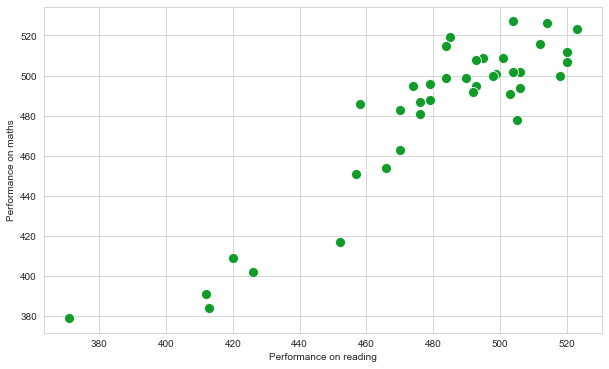

In [4]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


plt.figure( figsize = ( 10,6 ))


sns.set_style('whitegrid')
graph = sns.scatterplot(x = 'pisa_read' , y = 'pisa_math' , 
                data = df_2018 , color = '#119c2a' , s = 100 ) 

graph.set_xlabel('Performance on reading')
graph.set_ylabel('Performance on maths')


plt.savefig('scatterplot.png' , dpi = 300 )



### Exercise 12.4.

As for exercise 12.3, create a scatterplot which can help to visualise the correlation between the scores for reading and the scores for mathematics. This time, also add labels to indicate the scores for the countries captured in the list named `countries`, defined below. 

```
countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']
```

The font size of the label must be 12.8 and the font weight must be bold.
 

Text labels for the dots in a scatter plot can be added using `plt.text()`. The method demands at least parameters:

* Position on x-axis
* Position on y-axis
* Label (as a String)

There are a number of optional parameters:

* fontweight
* fontsize
* alpha 

Note that the labels need to be added one by one. The plt.text() function adds one label at a time. If your data is in a dataframe, you can work with `iterrows()`.


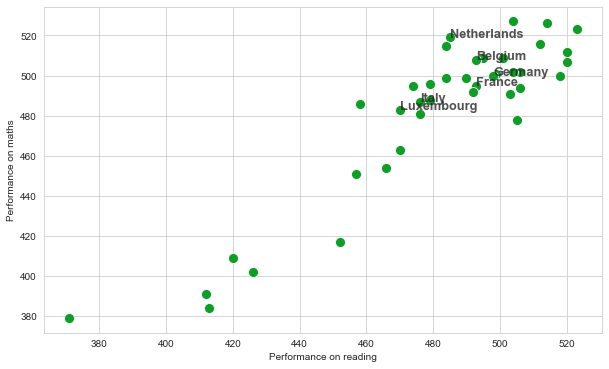

In [5]:
import pandas as pd

x_axis = 'pisa_read'
y_axis = 'pisa_math'

import matplotlib.pyplot as plt
import seaborn as sns

countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']


plt.figure( figsize = ( 10,6 ))


sns.set_style('whitegrid')
graph = sns.scatterplot(x = x_axis , y = y_axis , 
                data = df_2018 , color = '#119c2a' , s = 100 ) 

graph.set_xlabel('Performance on reading')
graph.set_ylabel('Performance on maths')

for i,row in df_2018.iterrows():
    if row['location_name'] in countries:
        plt.text( row[x_axis], row[y_axis] , row['location_name'] , 
                 fontsize=12.8 , fontweight = 'bold', alpha = 0.8)



### Exercise 12.5.

Add a new column to the `df_2018` dataframe which you created for the previous exercises, containing the avrage values for reading and mathematics. You can use the code below for this purpose.

```
df_2018['pisa_mean'] = df_2018[['pisa_read', 'pisa_math']].mean(axis=1)
```

Next, adjust the scatterplot that you created for exercise 12.5 in two ways. 

* The sizes of the points should reflect the values in this newly created columns named 'pisa_mean'. The sizes should range from 50 to 300.
* The colours of the points should provide information about the continents. 

Save the figure as a file named 'scatterplot.png'. The resolution should be 300 dpi. 

In [6]:
df_2018['pisa_mean'] = df_2018[['pisa_read', 'pisa_math']].mean(axis=1)

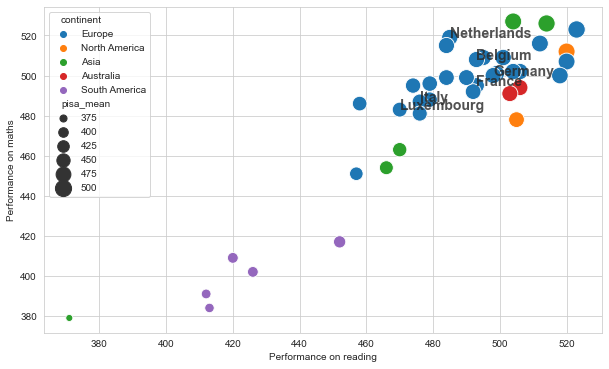

In [7]:
import pandas as pd

x_axis = 'pisa_read'
y_axis = 'pisa_math'
size = 'pisa_mean'
hue = 'continent'

import matplotlib.pyplot as plt
import seaborn as sns

countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg','Italy']


plt.figure( figsize = ( 10,6 ))


sns.set_style('whitegrid')
graph = sns.scatterplot(x = x_axis , y = y_axis , 
                data = df_2018 , 
                        hue = hue ,
                        size = size , sizes=( 50 , 300)) 

graph.set_xlabel('Performance on reading')
graph.set_ylabel('Performance on maths')

for i,row in df_2018.iterrows():
    if row['location_name'] in countries:
        plt.text( row[x_axis], row[y_axis] , row['location_name'] , 
                 fontsize=14 , fontweight = 'bold', alpha = 0.8)

plt.savefig('scatterplot.png' , dpi = 300 )

### Exercise 12.6.

Starting from the full PISA data set, creates a new dataframe containing the scores obtained by pupils in the Netherlands during the period in between 2004 and 2018. 

Use this new dataframe to trace the development of the reading scores in the Netherlands in between 2000 and 2018. Focus on the total scores.

In [8]:
df_nl = df[ df['location_name'] == 'Netherlands' ]
df_nl_tot = df_nl[ df_nl['subject'] == 'TOT' ] 

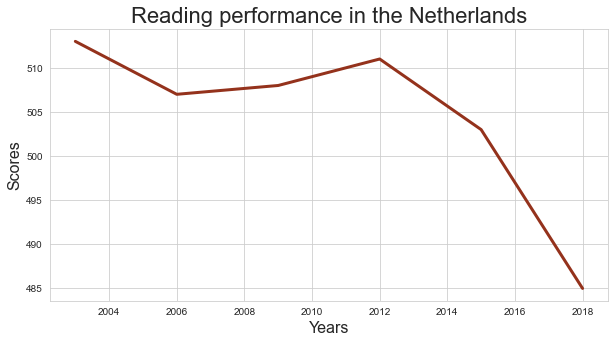

In [9]:
plt.figure( figsize = ( 10,5 ) )

graph = sns.lineplot( data = df_nl_tot, x='year', y='pisa_read', color='#94321c', linewidth=3 )

graph.set_xlabel('Years' , size = 16 )
graph.set_ylabel('Scores' , size = 16 )
graph.set_title( 'Reading performance in the Netherlands' , size = 22 )

plt.show()

### Ecercise 12.7. 

How did the scores for maths develop in the Netherlands in between 2000 and 2018? Focus on the score for boys and for girls separately. 
Tip: You can also work with the `hue` parameter in thae case of line charts.  

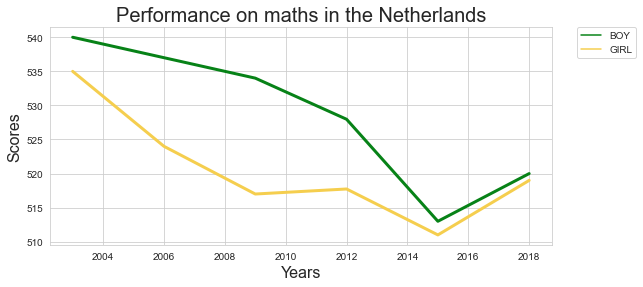

In [10]:
df_nl_bg = df_nl[ df_nl['subject'].isin( ['BOY','GIRL']  ) ]


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure( figsize = ( 9,4 ))
ax = plt.axes()


sns.lineplot( data = df_nl_bg , x = 'year' , y = 'pisa_math' ,  hue = 'subject' , palette = [ '#078217' , '#f5ce4e' ] ,  linewidth = 3 )

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


ax.set_xlabel('Years' , size = 16 )
ax.set_ylabel('Scores' , size = 16 )
ax.set_title( 'Performance on maths in the Netherlands' , size = 20 )

plt.savefig('maths.png')

12.1.7. Have the scores remained relatively stable over the years if we look at the total scores? Or has there been some variation? How does the variation of the scores for the Netherlands compare to the scores in France, Germany, Belgium and Luxembourg? Try to answer this question by crearing a boxplot. 

To answer question 12.1.1, create a new dataframe containing the total scores measured in the year 2018. We can subset the dataframe using square brackets. These brackets should contain a criterium that can serve as a filter.  

the `sort_values()` method can be used to sort the dataframe. The `by` parameter specifies the column you want to sort on. 

To vary the colours of the bars along with the continents (question 2), name the 'continent' column in the `hue` parameter. 

The code below creates a new dataframe, based on the original data frame that was created out of the original CSV file. It selects the scores obtained by pupils in the Netherlands during the period in between 2004 and 2018.  

The code below shows all the scores received by Dutch students (question 5).

To display the score for boys and for girls separately (question 6), we firstly need to create a dataframe which contains the scores for boys and girls. In other words, we need to select rows in which the `subject` column either has 'BOY' or 'GIRL' as a value. 

In [11]:
df_nl_bg = df_nl[ df_nl['subject'].isin( ['BOY','GIRL']  ) ]

The newly created dataframe `df_nl_bg` now contains all the values for Dutch boys and girls, measured in between 2000 and 2018. These values can be plotted as a line chart, using the `lineplot()` method in `Seaborn`. When you add a parameter named `hue`, pointing to the `subject` variable in the dataframe, different lines will be drawn for all the unique values in this particular column. 

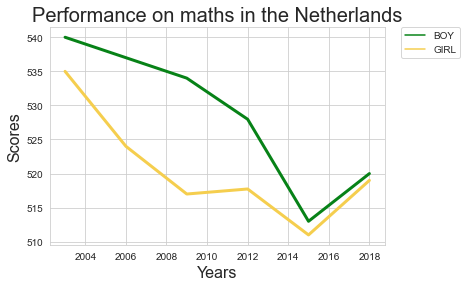

In [12]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure( figsize = ( 6,4 ))
ax = plt.axes()


sns.lineplot( data = df_nl_bg , x = 'year' , y = 'pisa_math' ,  hue = 'subject' , palette = [ '#078217' , '#f5ce4e' ] ,  linewidth = 3 )

# this next line makes sure that the legend is shown outside of the graph
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);


ax.set_xlabel('Years' , size = 16 )
ax.set_ylabel('Scores' , size = 16 )
ax.set_title( 'Performance on maths in the Netherlands' , size = 20 )


plt.savefig('maths.png')

### Exercise 12.8

Have the scores remained relatively stable over the years if we look at the total scores? Or has there been some variation? How does the variation of the scores for the Netherlands compare to the scores in France, Germany, Belgium and Luxembourg? Try to answer this question by crearing a boxplot. 

The names of the countries should be displayed on the X-axis, and the values associated with these countries should be displayed along the Y-axis. 

For this exercise, it can be useful to make a list containing the countries you are interesed in, and to filter the dataframe using the `isin()` function. 


```
countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg']
df_countries = df[ df['location_name'].isin(countries) ]
```

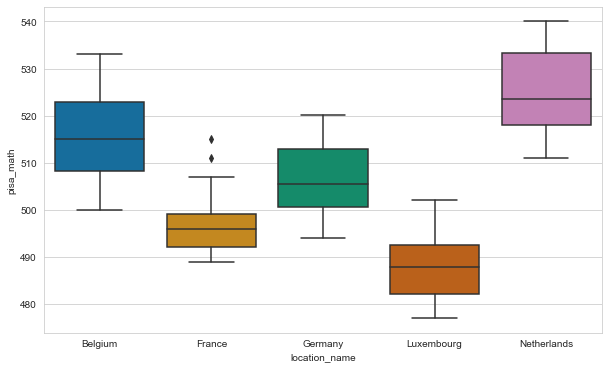

In [13]:

countries = [ 'Netherlands', 'France' , 'Germany' , 'Belgium', 'Luxembourg']
df_countries = df[ df['location_name'].isin(countries) ]


colours = sns.color_palette('colorblind' , len(countries))

plt.figure( figsize = (10,6) )


import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data= df_countries , x = 'location_name' , y = 'pisa_math' , palette = colours  );

### Exercise 12.9

The data folder of this tutorial includes a CSV file named 'nobel.csv'. If necessary you can also download this file from the following address: [https://edu.nl/3xmbd](https://edu.nl/3xmbd). 

Visualise the data in this data set in the following ways.

* Create a linechart in Seaborn to visualize the number of Nobel laureates per year. Can we find support for the claim that people increasingly need to share their Nobel Prizes with colleagues? 
* What are the nationalities of the Nobel laureates in the data set? Try to generate a bar plot which displays the various countries on the x-axis and the number of Nobel Prize winners produced by these countries on the y-axis. Limit your analysis to the countries listed in `countries` below.

```
    countries = ['Netherlands', 'France', 'Switzerland', 'India', 'Sweden',
       'Norway', 'United Kingdom', 'Spain', 'Russia', 'Poland', 'Germany',
       'Italy', 'United States of America', 'Belgium', 'Australia',
       'Ireland', 'Canada', 'Argentina', 'Japan', 'China', 'Brazil',
       'Bulgaria']
```


* Examine the correlation between the age of the Nobel laureate and year in which the prize was awarded. Do winners get younger, on average? Limit your analysis to the Prizes awarded in Chemistry. To answer this and the next question, you may reuse code developed for exercise 11.1.
* Create a boxplot to visualise the age distribution per category. 


In [14]:
from os.path import join
import pandas as pd

path_to_csv = join('..','Data','nobel.csv')
df = pd.read_csv(path_to_csv)

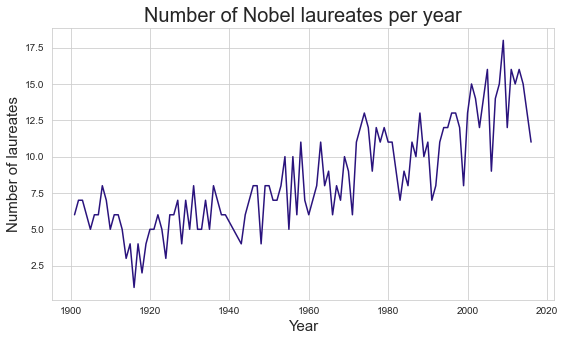

In [15]:
## group by year
laureates_per_year = df.groupby('Year')['Laureate ID'].count()

## convert the result of 'group by' to dataframe
lpg_df = laureates_per_year.to_frame()
lpg_df = lpg_df.reset_index()
columns = ['Year','Number']
lpg_df.columns = columns

plt.figure( figsize = (9,5))

graph = sns.lineplot( data = lpg_df , x = 'Year' , y = 'Number' , color = '#2a137d' )

graph.set_title('Number of Nobel laureates per year' , size = 20) 
graph.set_xlabel('Year' , size = 15) 
graph.set_ylabel('Number of laureates' , size = 15)

plt.show()

In [16]:
countries = ['Netherlands', 'France', 'Switzerland', 'India', 'Sweden',
       'Norway', 'United Kingdom', 'Spain', 'Russia', 'Poland', 'Germany',
       'Italy', 'United States of America', 'Belgium', 'Australia',
       'Ireland', 'Canada', 'Argentina', 'Japan', 'China', 'Brazil',
       'Bulgaria']

df_countries = df[ df['Birth Country'].isin(countries) ]

# group by countries
laureates_per_country = df_countries.groupby('Birth Country')['Laureate ID'].count()
lpg_df = laureates_per_country.to_frame()

# Rename the columns
lpg_df = lpg_df.reset_index()
columns = ['Country','Number']
lpg_df.columns = columns

# Sort countries by number of laureates
lpg_df = lpg_df.sort_values(by=['Number'] , ascending = False)


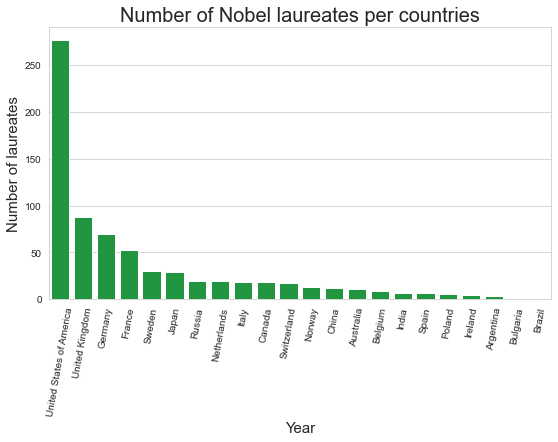

In [17]:
plt.figure( figsize = (9,5))

graph = sns.barplot( data = lpg_df , x = 'Country' , y = 'Number' , color = '#0fa838' )

graph.set_title('Number of Nobel laureates per countries' , size = 20) 
graph.set_xlabel('Year' , size = 15) 
graph.set_ylabel('Number of laureates' , size = 15)

plt.xticks(rotation=80)
plt.show()



In [18]:
# extract the year of birth from the birth date
df['Birth Year'] = pd.to_datetime(df['Birth Date']).dt.year

# calculate age by subtracting birth year from year of nobel prize 
df['Age'] = df['Year'] - df['Birth Year']


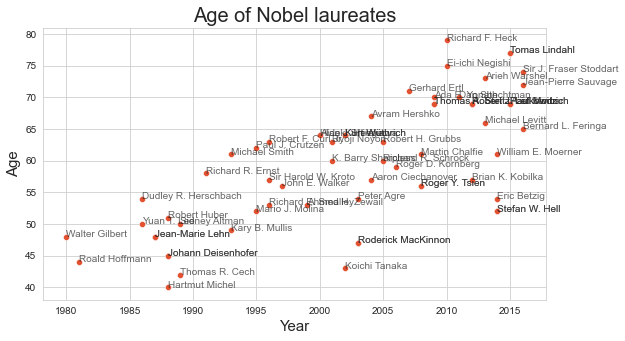

In [19]:
df_chem = df[ df['Category'] == 'Chemistry']
df_chem = df_chem[ df_chem['Birth Year'] > 1930 ]

fig = plt.figure( figsize = (9,5))

graph = sns.scatterplot( data = df_chem , x = 'Year' , y = 'Age' , color =  '#e35130')

graph.set_title('Age of Nobel laureates' , size = 20) 
graph.set_xlabel('Year' , size = 15) 
graph.set_ylabel('Age' , size = 15)

for i,row in df_chem.iterrows():
    plt.text( int(row['Year']) , int(row['Age']) , row['Full Name'] , alpha = 0.7)

plt.show()

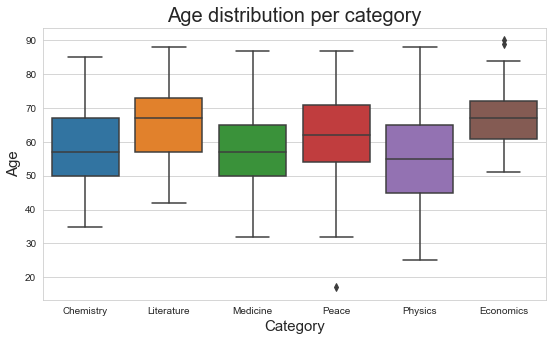

In [20]:
colours = ['#4287f5','#f5ce42','#b317e3','#b50430','#c97506','#35bd17']

fig = plt.figure( figsize = (9,5))

graph = sns.boxplot( data = df , x = 'Category' , y = 'Age' , palette= sns.color_palette() )

graph.set_title('Age distribution per category' , size = 20) 
graph.set_xlabel('Category' , size = 15) 
graph.set_ylabel('Age' , size = 15)

plt.show()

### Exercise 12.10

In exercise 11.3, you created a CSV file named 'prices_of_coffee_over_time.csv', containing data about the average price of a pound of coffee on a range of dates. Use this CSV file to create a line chart which visualises the development of these prices over time. 

In [ ]:
import pandas as pd

df = pd.read_csv('prices_of_coffee_over_time.csv')

df = df.sort_values(by=['date'])

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig = plt.figure( figsize = ( 16, 4))
ax = plt.axes()

ax.plot( df['date'] , df['price_per_pound'] , color = '#930d08' , linestyle = 'solid')

ax.set_xlabel('Date')
ax.set_ylabel('Price per pound')

plt.xticks(rotation= 90)

ax.set_title( 'VOC Coffee auctions')

plt.show()